In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<AxesSubplot:>

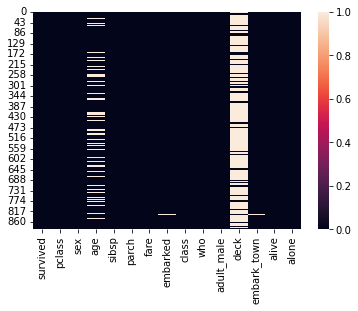

In [3]:
sns.heatmap(df.isnull())


In [4]:
df.drop('deck', axis = 1, inplace = True)

In [5]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [6]:
df.drop(['age', 'sibsp','parch'], axis = 1, inplace = True)

In [7]:
df.corr()

,survived,pclass,fare,adult_male,alone
survived,1.000000,-0.338481,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.549500,0.094035,0.135207
fare,0.257307,-0.549500,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,-0.271832,0.404744,1.000000


In [8]:
df.head()

,survived,pclass,sex,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,8.0500,S,Third,man,True,Southampton,no,True


In [9]:
df['sex'] = df['sex'].map({'male':1, 'female':0})

In [10]:
import pandas as pd

df = pd.concat([df, pd.get_dummies(df['embarked'])], axis = 1).drop('embarked', axis = 1)

In [11]:
df['alone'] = df['alone'].map({True:1, False:0})

In [12]:
df.drop(['class', 'who', 'adult_male', 'embark_town', 'alive'], axis = 1, inplace = True)

In [13]:
df.corr()

,survived,pclass,sex,fare,alone,C,Q,S
survived,1.000000,-0.338481,-0.543351,0.257307,-0.203367,0.168240,0.003650,-0.155660
pclass,-0.338481,1.000000,0.131900,-0.549500,0.135207,-0.243292,0.221009,0.081720
sex,-0.543351,0.131900,1.000000,-0.182333,0.303646,-0.082853,-0.074115,0.125722
fare,0.257307,-0.549500,-0.182333,1.000000,-0.271832,0.269335,-0.117216,-0.166603
alone,-0.203367,0.135207,0.303646,-0.271832,1.000000,-0.095298,0.086464,0.024929
C,0.168240,-0.243292,-0.082853,0.269335,-0.095298,1.000000,-0.148258,-0.778359
Q,0.003650,0.221009,-0.074115,-0.117216,0.086464,-0.148258,1.000000,-0.496624
S,-0.155660,0.081720,0.125722,-0.166603,0.024929,-0.778359,-0.496624,1.000000


<AxesSubplot:>

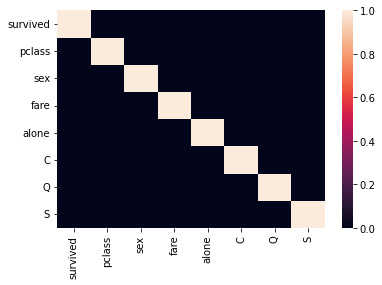

In [14]:
sns.heatmap(df.corr()>0.8)

In [15]:
df.isnull().sum()

survived    0
pclass      0
sex         0
fare        0
alone       0
C           0
Q           0
S           0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [17]:
y = df['survived']

In [18]:
X = df.drop('survived', axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
model = LogisticRegression().fit(X_train, y_train)

In [21]:
pred = model.predict(X_test)

In [22]:
model.score(X_test, y_test)

0.7877094972067039

In [23]:
# Breast Cancer Data

In [24]:
from sklearn.datasets import load_breast_cancer

In [25]:
bc = load_breast_cancer()

In [26]:
df = pd.DataFrame(bc.data, columns=bc.feature_names)

In [27]:
df['target'] = bc.target

In [28]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [34]:
pd.DataFrame({'Actual':y_test,'pred':pred}).sample(10)

,Actual,pred
833,0,0
384,0,0
77,0,0
5,0,0
619,0,0
293,0,1
693,0,0
648,0,0
644,1,1
299,1,1


In [53]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, log_loss

In [48]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[92 18]
 [20 49]]


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



In [44]:
141/179

0.7877094972067039

In [42]:
model.score(X_test, y_test)

0.7877094972067039

In [52]:
roc_auc_score(y_test, pred)

0.7732542819499342

In [55]:
log_loss(y_test, model.predict_proba(X_test))

0.4236179637100261